# Import libraries  

In [1]:
import pandas as pd
import numpy as np
import requests 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

   # EDA 

In [2]:
data = pd.read_csv('NoNullNew.csv')

In [3]:
data.dataframeName = 'NoNullNew.csv'
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 45378 rows and 26 columns


In [4]:

data.head(5)


,EGENDER,MS,SSADECISN,EXPNS_DIF,CHNGSHOP1,CHNGSHOP2,CHNGSHOP3,CURFOODSUF,WORRY,INTEREST,...,MH_SVCS,MH_NOTGET,SEEING,HEARING,REMEMBERING,MOBILITY,TENURE,LIVQTRRV,TNUM_PS,ANXIOUS
0,2,1,1,1,2,2,2,1,1,1,...,2,2,1,1,1,1,2,2,2,1
1,1,1,1,2,2,2,2,1,2,3,...,1,2,1,1,1,1,2,2,1,2
2,2,1,1,1,2,2,2,1,1,1,...,2,2,1,1,1,1,2,2,2,1
3,2,2,1,1,2,2,2,1,1,1,...,2,2,1,1,1,1,2,5,1,1
4,1,3,1,1,2,2,2,1,1,1,...,2,2,1,2,1,1,3,2,1,1


In [5]:
col_names = data.columns

col_names

Index(['EGENDER', 'MS', 'SSADECISN', 'EXPNS_DIF', 'CHNGSHOP1', 'CHNGSHOP2',
       'CHNGSHOP3', 'CURFOODSUF', 'WORRY', 'INTEREST', 'DOWN', 'HLTHINS1',
       'DELAY', 'NOTGET', 'TELEHLTH', 'PRESCRIPT', 'MH_SVCS', 'MH_NOTGET',
       'SEEING', 'HEARING', 'REMEMBERING', 'MOBILITY', 'TENURE', 'LIVQTRRV',
       'TNUM_PS', 'ANXIOUS'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45378 entries, 0 to 45377
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   EGENDER      45378 non-null  int64
 1   MS           45378 non-null  int64
 2   SSADECISN    45378 non-null  int64
 3   EXPNS_DIF    45378 non-null  int64
 4   CHNGSHOP1    45378 non-null  int64
 5   CHNGSHOP2    45378 non-null  int64
 6   CHNGSHOP3    45378 non-null  int64
 7   CURFOODSUF   45378 non-null  int64
 8   WORRY        45378 non-null  int64
 9   INTEREST     45378 non-null  int64
 10  DOWN         45378 non-null  int64
 11  HLTHINS1     45378 non-null  int64
 12  DELAY        45378 non-null  int64
 13  NOTGET       45378 non-null  int64
 14  TELEHLTH     45378 non-null  int64
 15  PRESCRIPT    45378 non-null  int64
 16  MH_SVCS      45378 non-null  int64
 17  MH_NOTGET    45378 non-null  int64
 18  SEEING       45378 non-null  int64
 19  HEARING      45378 non-null  int64
 20  REMEMB

In [7]:
print('ANXIOUS contains', len(data['ANXIOUS'].unique()), 'labels')

ANXIOUS contains 4 labels


In [8]:
data['ANXIOUS'].unique()

array([1, 2, 3, 4], dtype=int64)

In [9]:
data.ANXIOUS.value_counts()

1    22638
2    13616
4     4929
3     4195
Name: ANXIOUS, dtype: int64

     Summary Statistics

In [10]:

print(round(data[col_names].describe()),2)

       EGENDER       MS  SSADECISN  EXPNS_DIF  CHNGSHOP1  CHNGSHOP2  \
count  45378.0  45378.0    45378.0    45378.0    45378.0    45378.0   
mean       2.0      2.0        1.0        1.0        2.0        2.0   
std        0.0      2.0        0.0        1.0        0.0        0.0   
min        1.0      1.0        1.0        1.0        1.0        1.0   
25%        1.0      1.0        1.0        1.0        1.0        2.0   
50%        2.0      1.0        1.0        1.0        2.0        2.0   
75%        2.0      3.0        1.0        2.0        2.0        2.0   
max        2.0      5.0        4.0        4.0        2.0        2.0   

       CHNGSHOP3  CURFOODSUF    WORRY  INTEREST  ...  MH_SVCS  MH_NOTGET  \
count    45378.0     45378.0  45378.0   45378.0  ...  45378.0    45378.0   
mean         2.0         1.0      2.0       2.0  ...      2.0        2.0   
std          0.0         0.0      1.0       1.0  ...      0.0        0.0   
min          1.0         1.0      1.0       1.0  ...    

# Variable Distribution 

In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

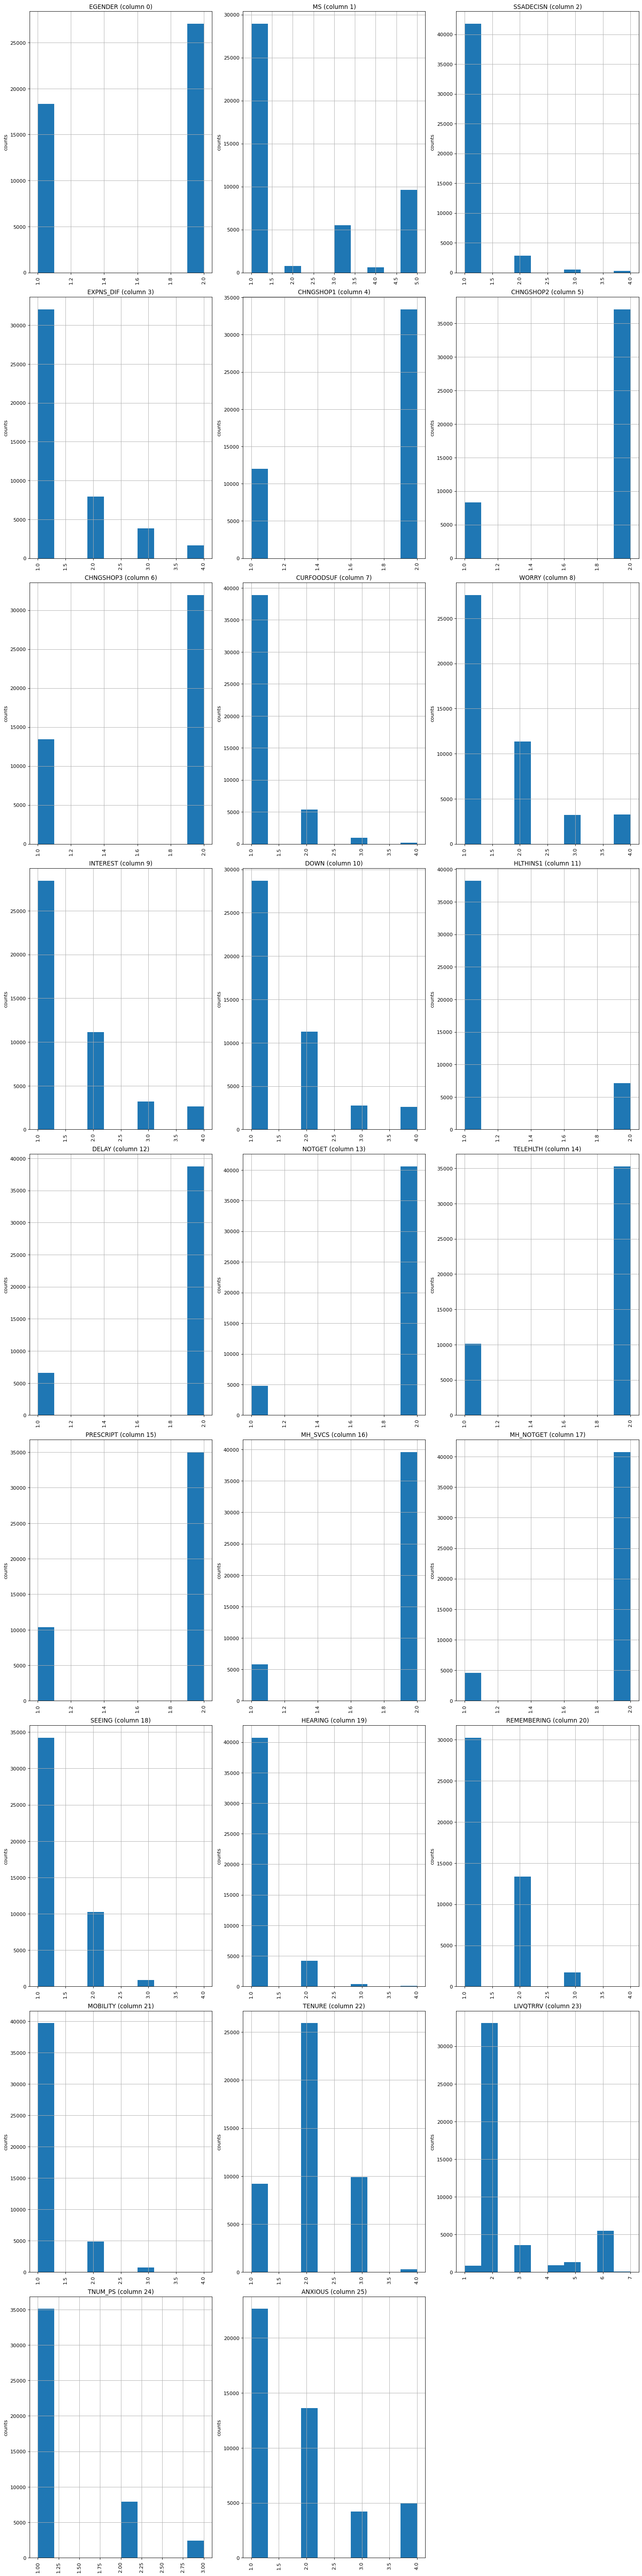

In [12]:
plotPerColumnDistribution(data, 30, 3)

# Correlation matrix

In [13]:

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix ', fontsize=15)
    plt.show()

# Logistic Regression Algorithm

In [ ]:
dataset = data.values
X = data.iloc[:,0:25]
y = data['ANXIOUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [ ]:
logmodel = LogisticRegression(class_weight = 'balanced', max_iter=10000)

# fit the model
logi= logmodel.fit(X_train, y_train)
prediction_log = logmodel.predict(X_test)
y_pred = logmodel.predict(X_test)

# Accuracy Rate

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction_log))

# F1-Score

In [ ]:
print(classification_report(y_test, prediction_log))

# Auc-Roc

In [ ]:
y1 = preprocessing.label_binarize(y, classes=[1,2,3,4])
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)

In [ ]:
classifier = OneVsRestClassifier(LogisticRegression(class_weight = 'balanced', max_iter=10000))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
 

In [ ]:
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Logistic Regression")
plt.legend(loc="lower right")
plt.show()

auc = metrics.roc_auc_score(y_test, y_score)
print(auc)



# Random Forest Algorithm

# Hyper Parameters Tuning 

In [14]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [23]:
X = data.iloc[:,1:25]
y = data['ANXIOUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)

In [24]:
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train,y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [25]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [26]:
display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 250}


0.636 + or -0.033 for the {'max_depth': 2, 'n_estimators': 5}
0.664 + or -0.023 for the {'max_depth': 2, 'n_estimators': 10}
0.679 + or -0.013 for the {'max_depth': 2, 'n_estimators': 50}
0.675 + or -0.012 for the {'max_depth': 2, 'n_estimators': 100}
0.676 + or -0.003 for the {'max_depth': 2, 'n_estimators': 250}
0.725 + or -0.015 for the {'max_depth': 4, 'n_estimators': 5}
0.731 + or -0.017 for the {'max_depth': 4, 'n_estimators': 10}
0.73 + or -0.01 for the {'max_depth': 4, 'n_estimators': 50}
0.742 + or -0.002 for the {'max_depth': 4, 'n_estimators': 100}
0.743 + or -0.003 for the {'max_depth': 4, 'n_estimators': 250}
0.758 + or -0.01 for the {'max_depth': 8, 'n_estimators': 5}
0.763 + or -0.01 for the {'max_depth': 8, 'n_estimators': 10}
0.771 + or -0.003 for the {'max_depth': 8, 'n_estimators': 50}
0.771 + or -0.003 for the {'max_depth': 8, 'n_estimators': 100}
0.771 + or -0.002 for the {'max_depth': 8, 'n_estimators':

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=100)
forest = RandomForestClassifier(max_depth=16, n_estimators=250, random_state=100)

In [28]:
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

## Accuracy and Error rate

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7753782870574408


# F1-Score

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.85      0.91      0.88      6792
           2       0.68      0.71      0.70      4085
           3       0.55      0.32      0.40      1258
           4       0.81      0.71      0.76      1479

    accuracy                           0.78     13614
   macro avg       0.72      0.66      0.68     13614
weighted avg       0.77      0.78      0.77     13614



# AUC-ROC

In [30]:
y = preprocessing.label_binarize(y, classes=[1,2,3,4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
classifier = OneVsRestClassifier(RandomForestClassifier(max_depth=16, n_estimators=250, random_state=100))
y_score = cv.predict_proba(X_test)

In [32]:
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [33]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

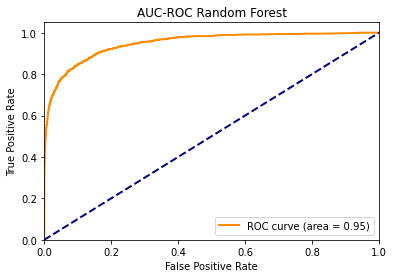

0.9476324541485108


In [34]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)



plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.plot(roc_auc[2],'r-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Random Forest")
plt.legend(loc="lower right")
plt.show()

auc = metrics.roc_auc_score(y_test, y_score)
print(auc)
